In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.patches import Rectangle

In [2]:
df = pd.read_csv('./data/stock1-cleaned.csv')

In [3]:
# See https://docs.python.org/3/library/datetime.html
# The hour is not zero padded, so %-I
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%m/%d/%Y %I:%M %p')

In [30]:
def plot_spread_analysis(df, desired_date):    
    recent_data = df[df['DateTime'].dt.date == desired_date].copy()
    
    # Get first 15 minutes (9:30 to 9:45).
    first_15min = recent_data[recent_data['DateTime'].dt.time <= datetime.time(9, 45)]
    max_15min = first_15min['High'].max()
    min_15min = first_15min['Low'].min()

    # Determine line color based on trend vs previous close.
    current_close = first_15min['Close'].iloc[-1]

    prev_dates = df[df['DateTime'].dt.date < desired_date]['DateTime'].dt.date.unique()
    if len(prev_dates) > 0:
        prev_date = max(prev_dates)  # Most recent date before today
        print(f'using {prev_date} as previous date')
        prev_close_data = df[df['DateTime'].dt.date == prev_date]
        prev_close = prev_close_data['Close'].iloc[-1]
        line_color = 'green' if current_close > prev_close else 'red'
    else:
        print('no data for previous day found')
        line_color = 'black'

    
    #fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), height_ratios=[3, 1])
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # ===== MAIN CANDLESTICK CHART =====
    for i, (idx, row) in enumerate(recent_data.iterrows()):
        open_price = row['Open']
        close_price = row['Close']
        high_price = row['High']
        low_price = row['Low']
        
        # Determine candle color.
        color = 'green' if close_price > open_price else 'red'
        
        # Draw the high-low line.
        ax1.plot([i, i], [low_price, high_price], color=color, linewidth=1)
        
        # Draw the open-close rectangle.
        height = abs(close_price - open_price)
        bottom = min(open_price, close_price)
        rect = Rectangle((i-0.3, bottom), 0.6, height, facecolor=color, alpha=0.7, edgecolor=color)
        ax1.add_patch(rect)
       
    # Plot horizontal lines for first 15min high/low.
    ax1.axhline(y=max_15min, color=line_color, linestyle='-', linewidth=3, alpha=0.5, label=f'15min High: ${max_15min:.2f}')
    ax1.axhline(y=min_15min, color=line_color, linestyle='-', linewidth=3, alpha=0.5, label=f'15min Low: ${min_15min:.2f}')

    # Calculate where 10-minute marks would be on your x-axis
    first_time = recent_data['DateTime'].iloc[0]
    last_time = recent_data['DateTime'].iloc[-1]
    
    # Create 20-minute intervals
    tick_times = pd.date_range(
        start=first_time.floor('10min'),  # Round down to nearest 10-min
        end=last_time.ceil('10min'),      # Round up to nearest 10-min
        freq='30min'
    )
    
    # Convert these times to x-axis positions
    tick_positions = []
    total_duration = (last_time - first_time).total_seconds()
    for tick_time in tick_times:
        # Calculate position based on time elapsed
        time_elapsed = (tick_time - first_time).total_seconds()
        position = (time_elapsed / total_duration) * (len(recent_data) - 1)
        tick_positions.append(position)
    
    tick_labels = [t.strftime('%H:%M') for t in tick_times]
    ax1.set_xticks(tick_positions)
    ax1.set_xticklabels(tick_labels, rotation=45)

    # Add vertical line at 9:45am.
    line_945_time = first_time.replace(hour=9, minute=45, second=0, microsecond=0)
    time_elapsed_945 = (line_945_time - first_time).total_seconds()
    position_945 = (time_elapsed_945 / total_duration) * (len(recent_data) - 1)
    ax1.axvline(x=position_945, color='black', linestyle='--', linewidth=1, alpha=0.7, label='9:45 AM')

    # Add vertical line at 3:00pm.
    line_3pm_time = first_time.replace(hour=15, minute=00, second=0, microsecond=0)
    time_elapsed_3pm = (line_3pm_time - first_time).total_seconds()
    position_3pm = (time_elapsed_3pm / total_duration) * (len(recent_data) - 1)
    ax1.axvline(x=position_3pm, color='black', linestyle='--', linewidth=1, alpha=0.7, label='3:pm PM')

    ax1.set_ylabel('Price ($)')
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [42]:
df['DateTime'].iloc[0]

Timestamp('2025-06-26 16:00:00')

In [39]:
np.flip( df['DateTime'].dt.date.unique() )

array([datetime.date(2025, 7, 2), datetime.date(2025, 7, 1),
       datetime.date(2025, 6, 30), datetime.date(2025, 6, 27),
       datetime.date(2025, 6, 26)], dtype=object)

using 2025-07-01 as previous date


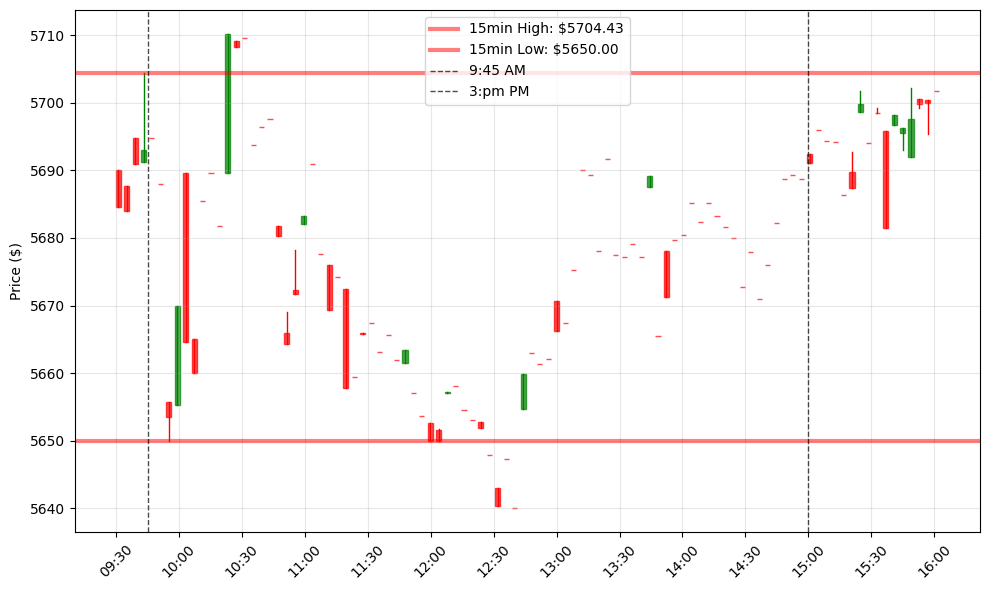

In [31]:
plot_spread_analysis(df, datetime.date(2025, 7, 2))

using 2025-06-30 as previous date


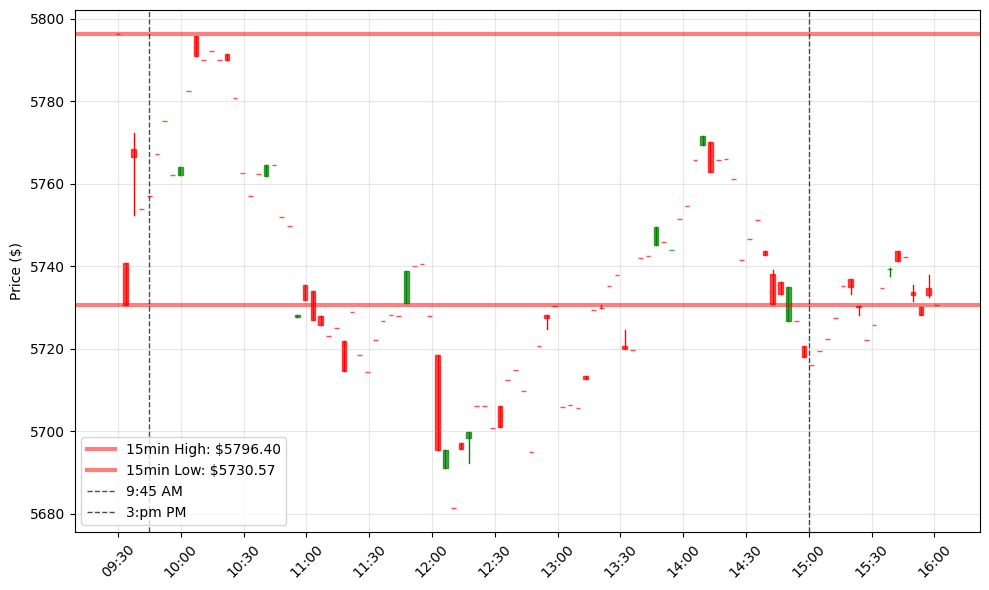

In [32]:
plot_spread_analysis(df, datetime.date(2025, 7, 1))

using 2025-06-27 as previous date


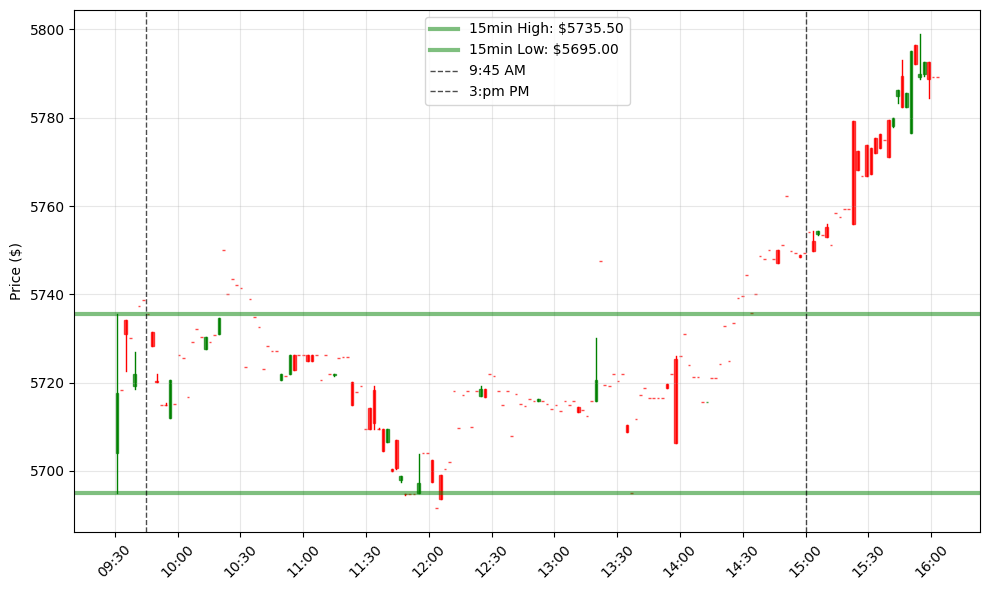

In [33]:
plot_spread_analysis(df, datetime.date(2025, 6, 30))

using 2025-06-26 as previous date


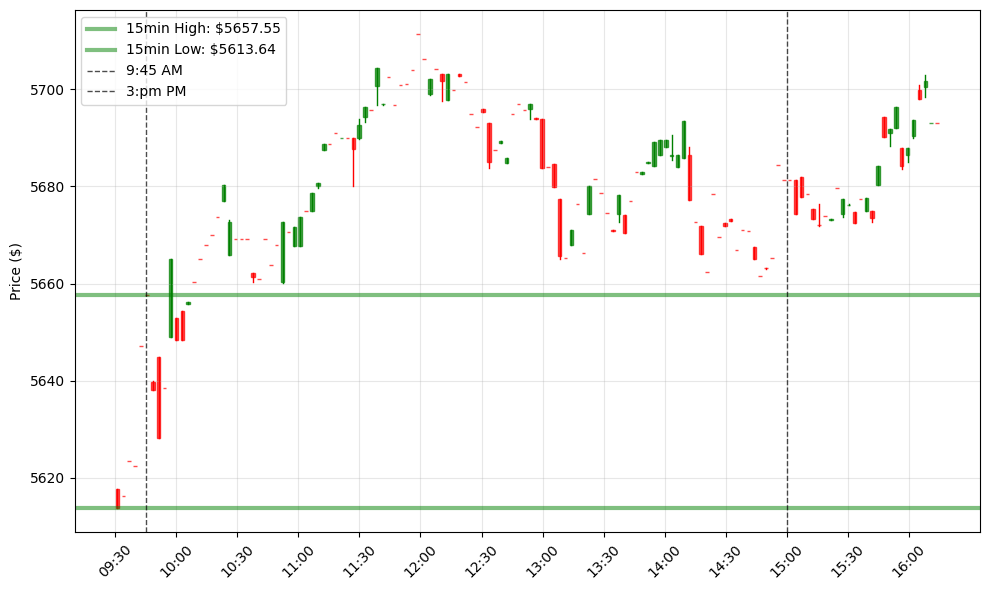

In [36]:
plot_spread_analysis(df, datetime.date(2025, 6, 27))